# Seidel Switching Largest Component #

The aim of this notebook is to determine the largest component size after n Seidel switchings.

#### Import dependencies ####

In [1]:
#Creating a graph switching function
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import copy as copy
import numpy as np
import random as rd

#### Create the Seidel switching function

In [4]:
def switch(G,v):
    ''' This function will take a graph G and one of it's vertices v, and will output the switching on this vertex '''
    
    nonneighbors = nx.non_neighbors(G, v)
    
    H = copy.deepcopy(G)
    #This will remove all the edges currently incident to v
    H.remove_node(v)
    H.add_node(v)
    
    #This adds the possible edges that were initially not incident to v
    for n in nonneighbors:
        H.add_edge(v,n)
        
    return(H)

#### Create the largest component function

In [5]:
def largest_switch_component(G,n):
    '''This will find the size of the largest component in G for each of n switchings'''
    sizes = np.zeros(n)
    for i in range(n):
        largest_cc = max(nx.connected_components(G), key=len)
        sizes[i] = len(largest_cc)
        G = switch(G,rd.sample(G.nodes,1)[0])
    return sizes

## Trials

Now, I will plot the larges switch component over time for various graphs. I will also plot the minimum largest component size for graphs on various number of vertices. 

#### Petersen Graph ####

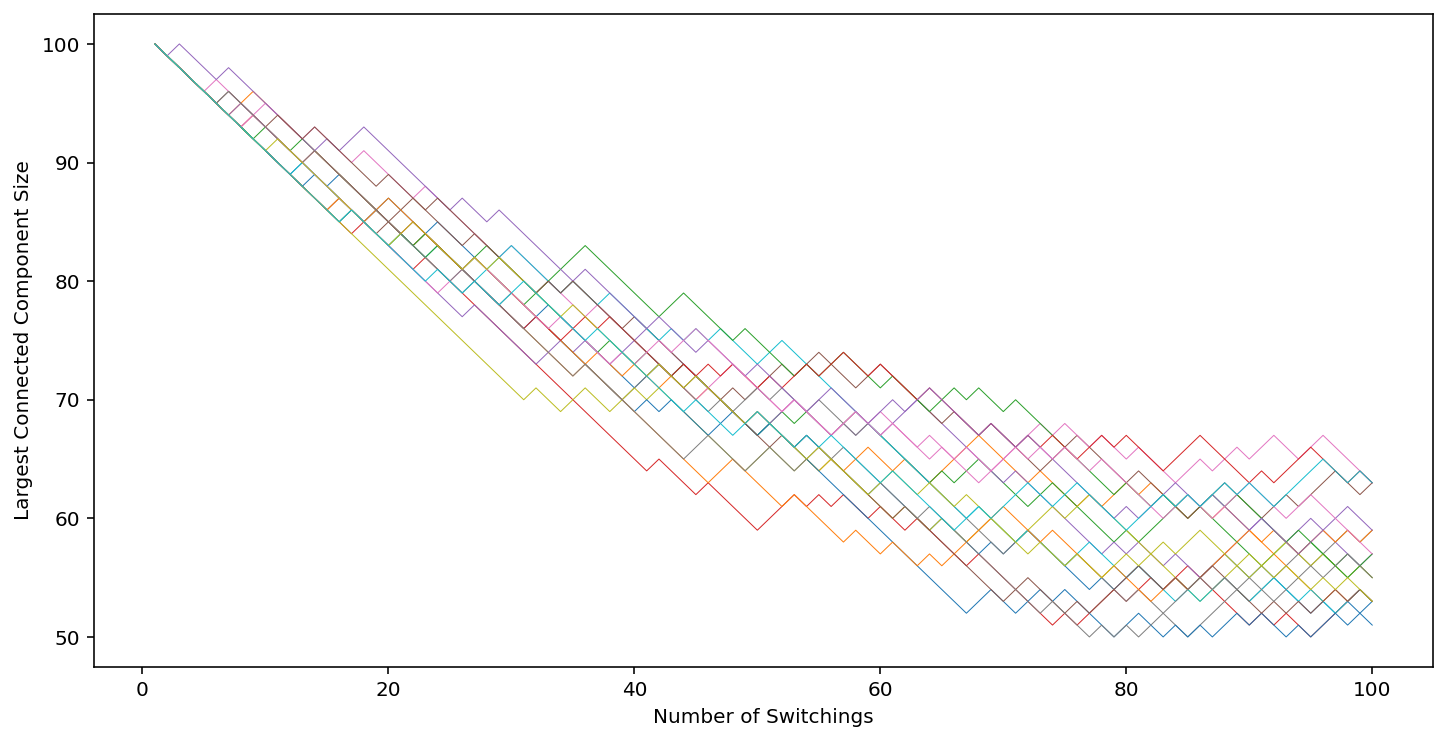

In [6]:
# the number of switchings
N = 100
#This is the number of random walks
W = 20
#This is the graph we are testing
G = nx.complete_graph(100)


plt.figure(figsize=(12,6))
T = range(1,N+1)
plt.xlabel('Number of Switchings')
plt.ylabel('Largest Connected Component Size')

for i in range(W):
    X = largest_switch_component(G,N)
    plt.plot(T,X,linewidth=0.5,alpha=1)

#### Cycle Graphs

As expected, the cycle graph will almost always remain connected. This also means the minimum largest component will be almost as large as the maximum. 

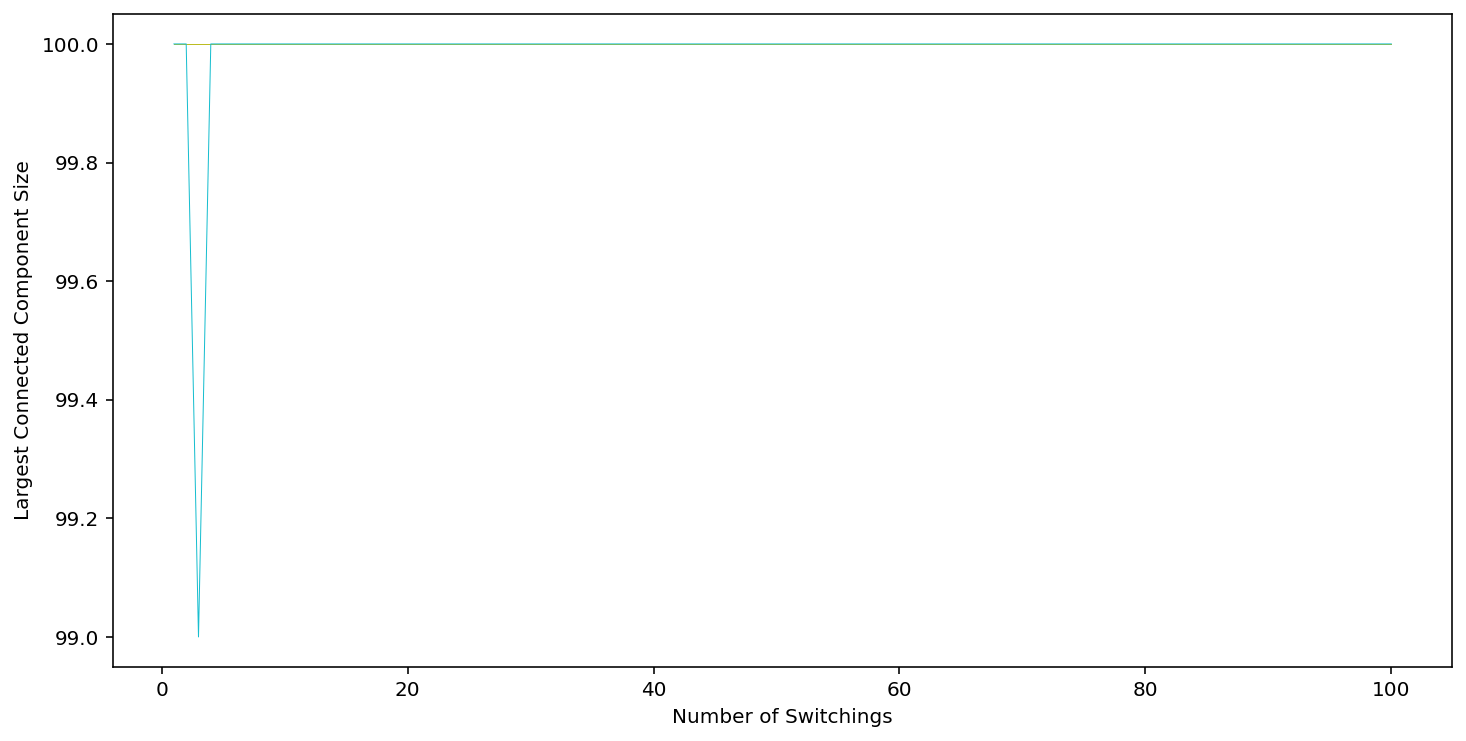

In [7]:
# the number of switchings
N = 100
#This is the number of random walks
W = 20
#This is the graph we are testing
G = nx.cycle_graph(100)


plt.figure(figsize=(12,6))
T = range(1,N+1)
plt.xlabel('Number of Switchings')
plt.ylabel('Largest Connected Component Size')

for i in range(W):
    X = largest_switch_component(G,N)
    plt.plot(T,X,linewidth=0.5,alpha=1)

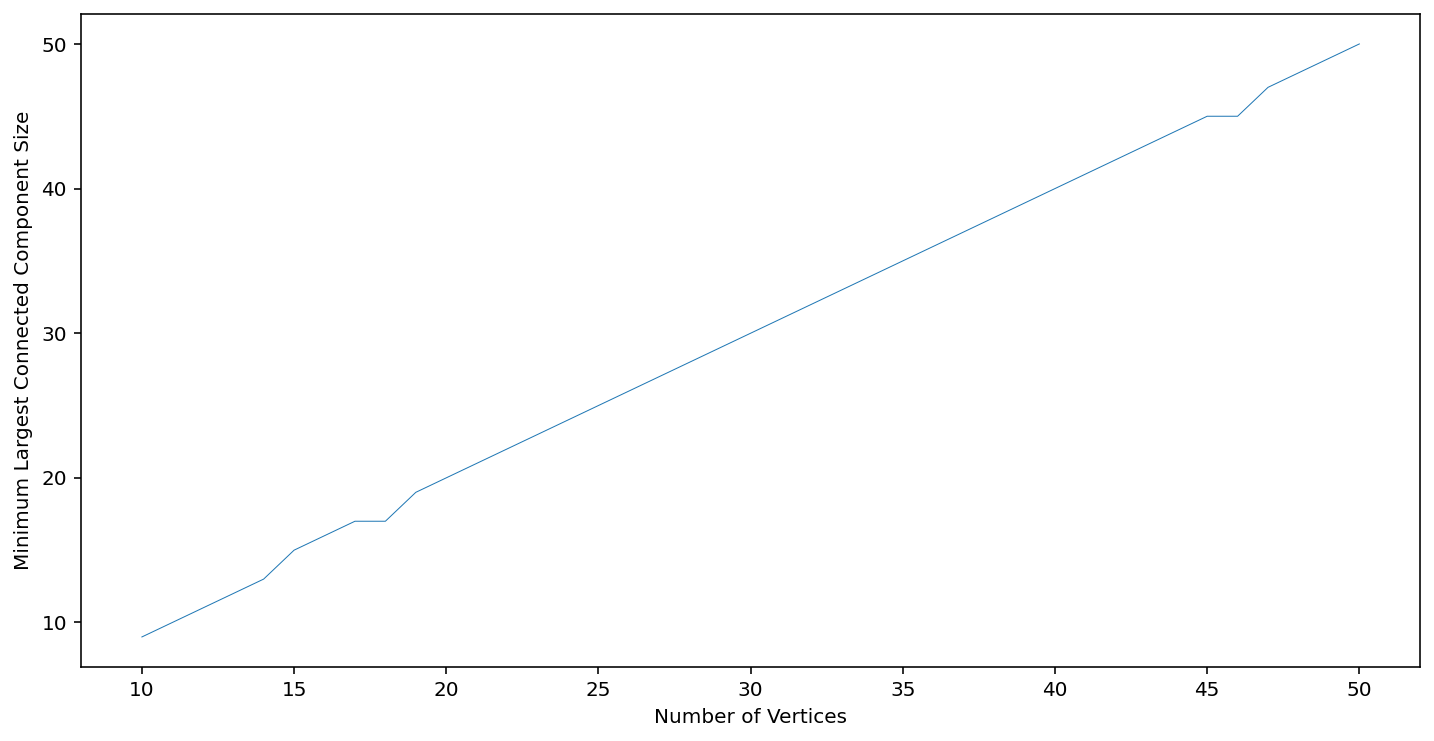

In [9]:
# the number of switchings
N = 1000
#The smallest complete graph to test
min_size = 10
max_size = 50

sizes = [i for i in range(min_size, max_size + 1)]
mins = []

#This is the graph we are testing
for i in range(min_size, max_size + 1):
    G = nx.cycle_graph(i)
    X = largest_switch_component(G,N)
    mins.append(np.amin(X))
    
plt.figure(figsize=(12,6))
T = range(1,N+1)
plt.xlabel('Number of Vertices')
plt.ylabel('Minimum Largest Connected Component Size')
plt.plot(sizes,mins,linewidth=0.5,alpha=1)

#### Complete Graphs

As expected, the largest component size will drop to about half of the vertices as more switchings occur. The largest component size will never be less than half of the vertices, since the switchings on a complete graph will be bipartite or complete. 

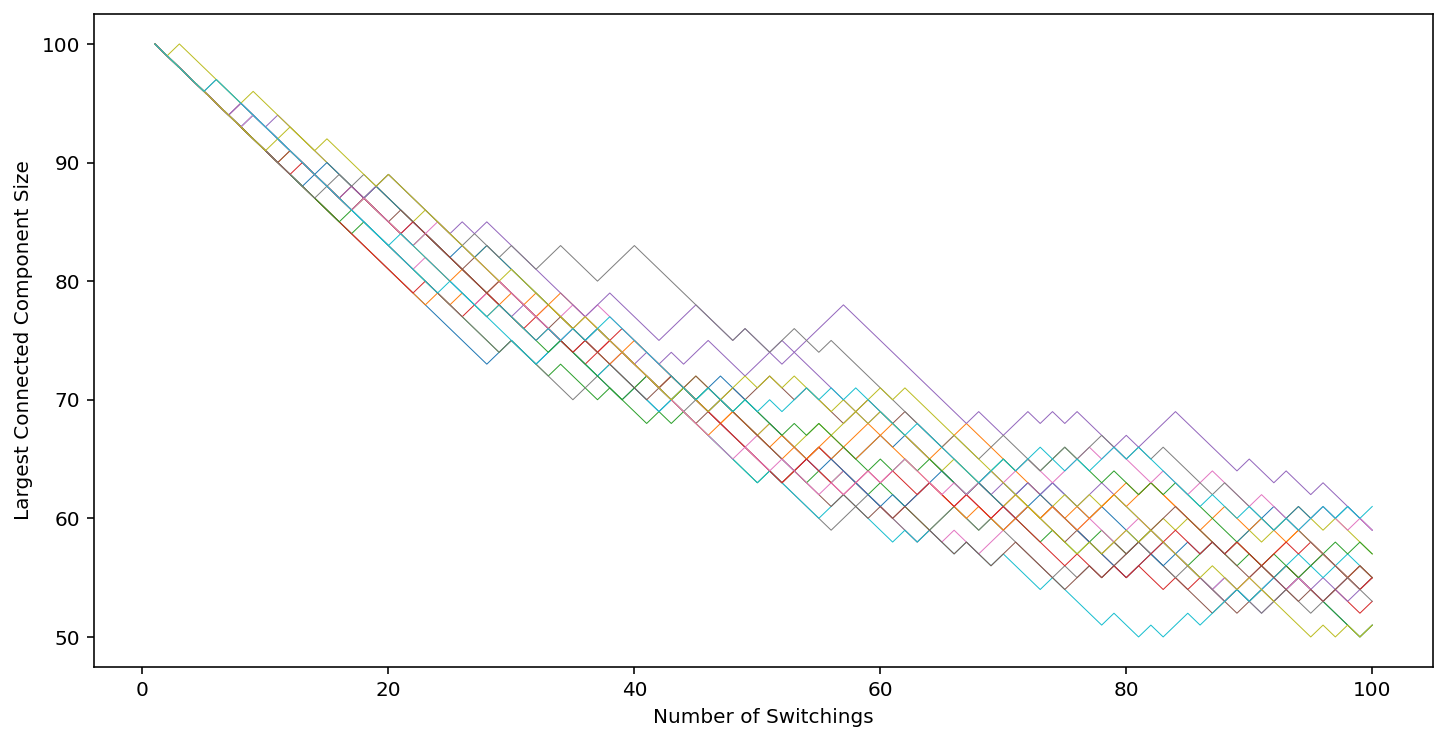

In [4]:
# the number of switchings
N = 100
#This is the number of random walks
W = 20
#This is the graph we are testing
G = nx.complete_graph(100)


plt.figure(figsize=(12,6))
T = range(1,N+1)
plt.xlabel('Number of Switchings')
plt.ylabel('Largest Connected Component Size')

for i in range(W):
    X = largest_switch_component(G,N)
    plt.plot(T,X,linewidth=0.5,alpha=1)

The function below will tell me the minimum of the largest component size for n random switchings of graph G.

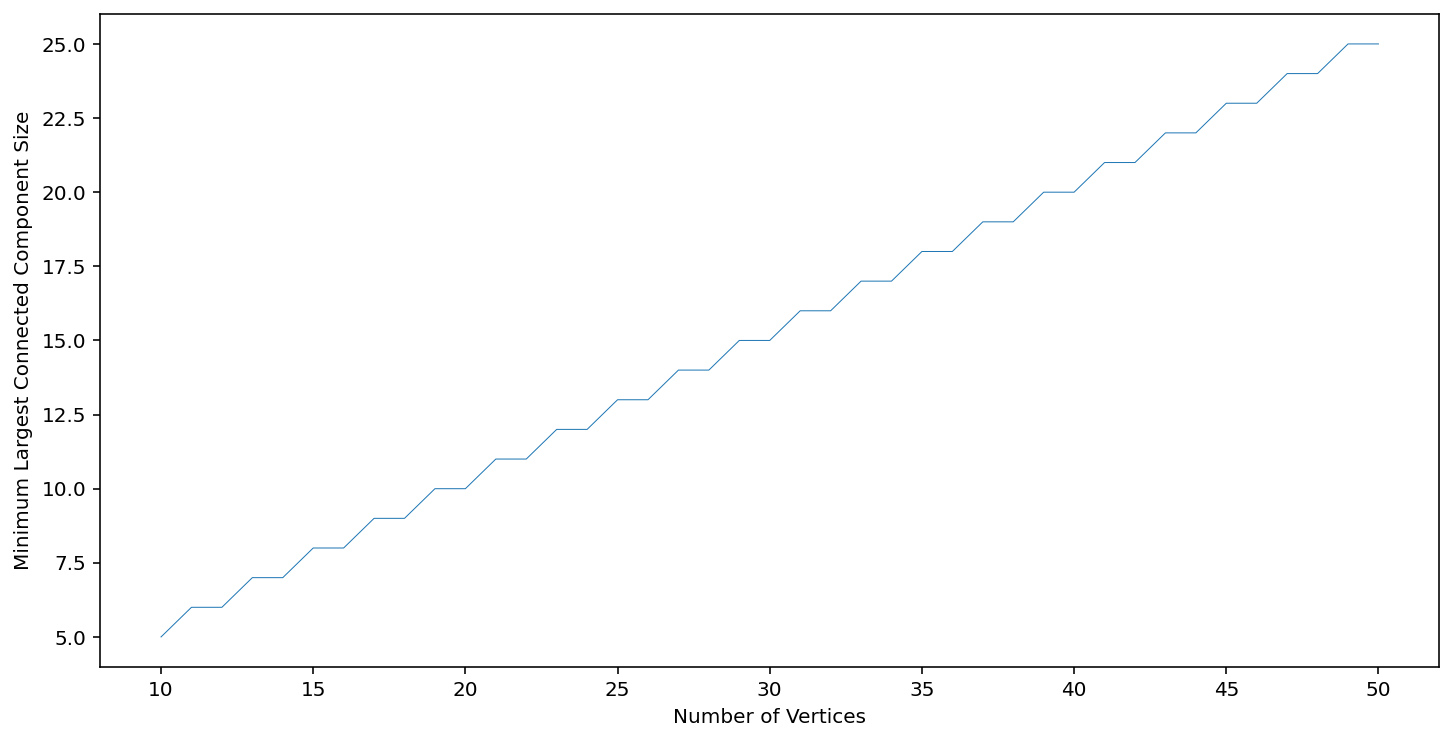

In [13]:
# the number of switchings
N = 1000
#The smallest complete graph to test
min_size = 10
max_size = 50

sizes = [i for i in range(min_size, max_size + 1)]
mins = []

#This is the graph we are testing
for i in range(min_size, max_size + 1):
    G = nx.complete_graph(i)
    X = largest_switch_component(G,N)
    mins.append(np.amin(X))
    
plt.figure(figsize=(12,6))
T = range(1,N+1)
plt.xlabel('Number of Vertices')
plt.ylabel('Minimum Largest Connected Component Size')
plt.plot(sizes,mins,linewidth=0.5,alpha=1)

#### Star Graphs ####
The star graphs will remain connected unless the central vertex is selected at random, in which case the graph will be mostly disconnected. The results are not very interesting.

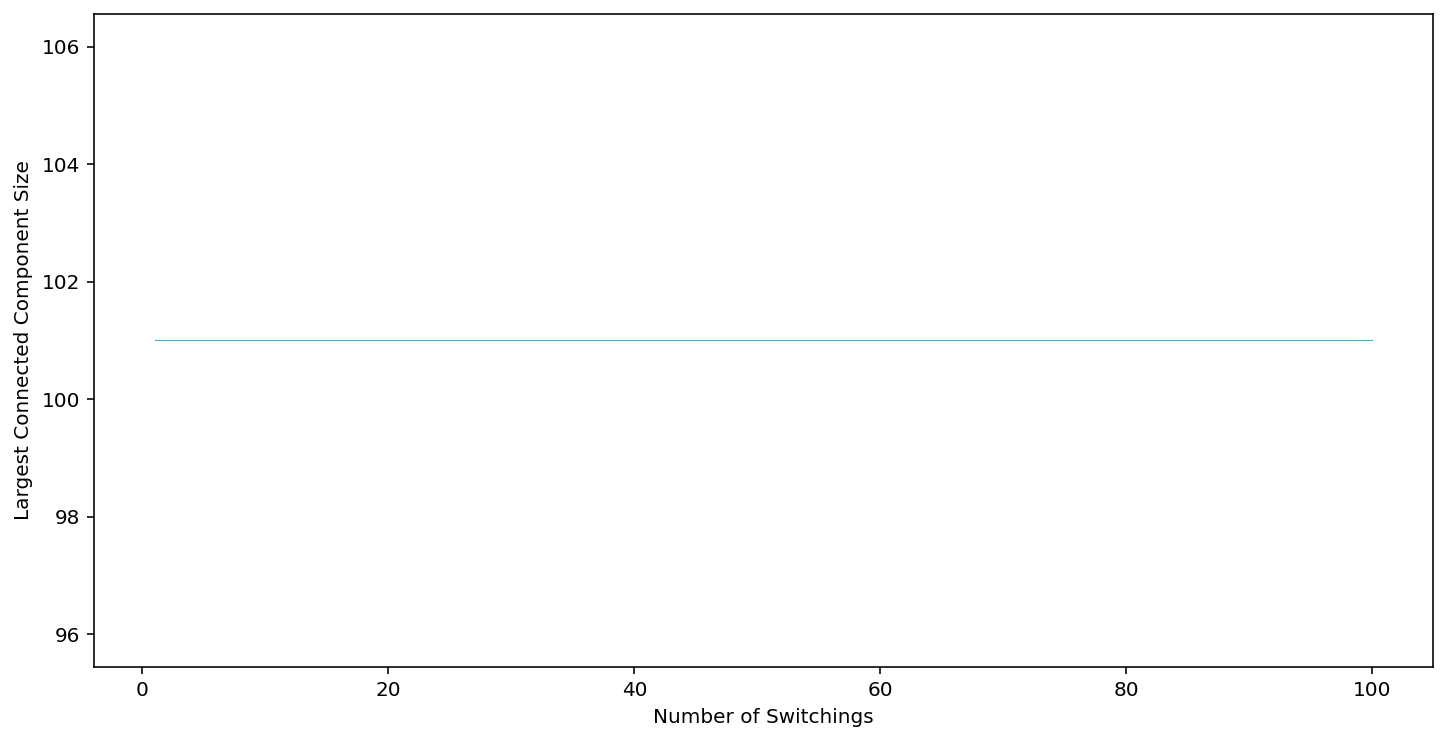

In [11]:
# the number of switchings
N = 100
#This is the number of random walks
W = 20
#This is the graph we are testing
G = nx.star_graph(100)


plt.figure(figsize=(12,6))
T = range(1,N+1)
plt.xlabel('Number of Switchings')
plt.ylabel('Largest Connected Component Size')

for i in range(W):
    X = largest_switch_component(G,N)
    plt.plot(T,X,linewidth=0.5,alpha=1)

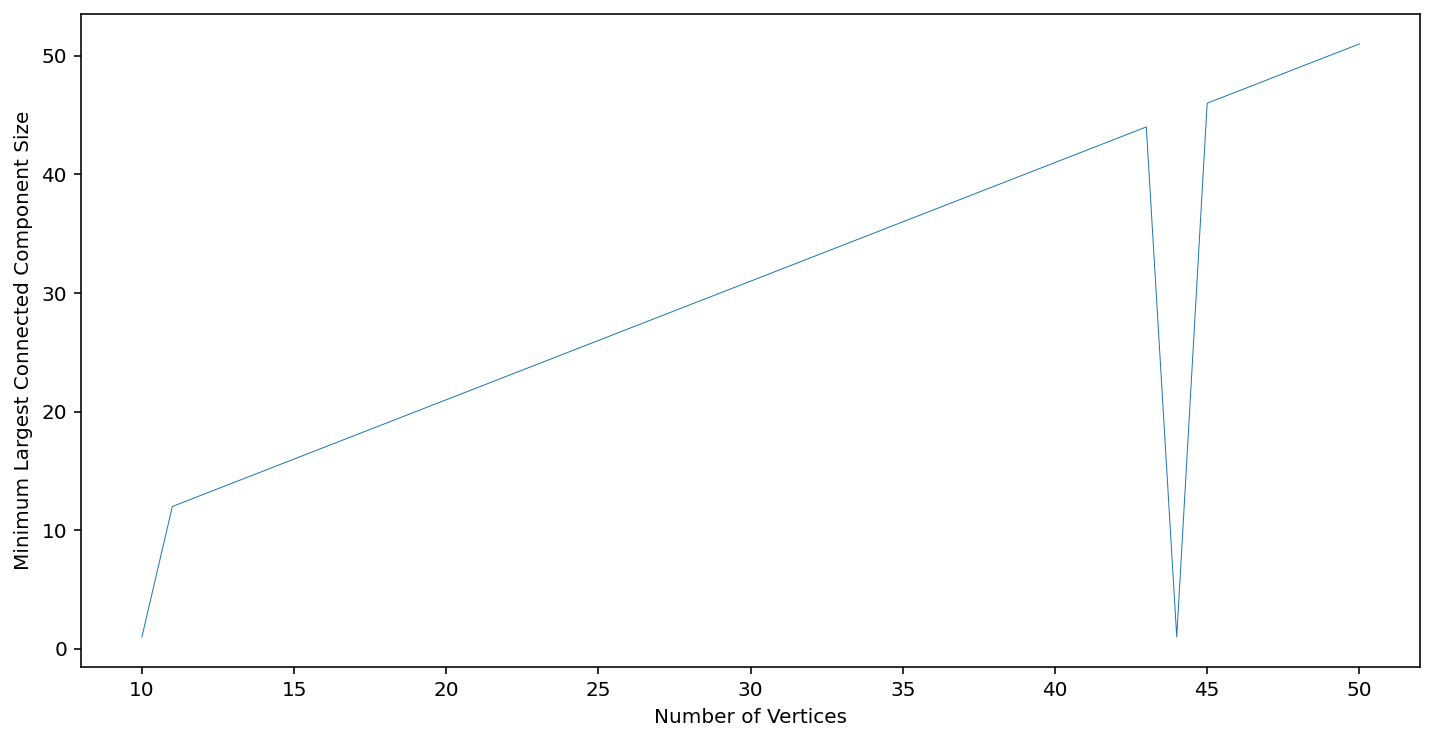

In [12]:
# the number of switchings
N = 1000
#The smallest complete graph to test
min_size = 10
max_size = 50

sizes = [i for i in range(min_size, max_size + 1)]
mins = []

#This is the graph we are testing
for i in range(min_size, max_size + 1):
    G = nx.star_graph(i)
    X = largest_switch_component(G,N)
    mins.append(np.amin(X))
    
plt.figure(figsize=(12,6))
T = range(1,N+1)
plt.xlabel('Number of Vertices')
plt.ylabel('Minimum Largest Connected Component Size')
plt.plot(sizes,mins,linewidth=0.5,alpha=1)

#### Wheel Graphs ####

The results will be similar to the results from the star graph. If the central vertex is selected, the largest component size will still be close to the maximum largest component size.

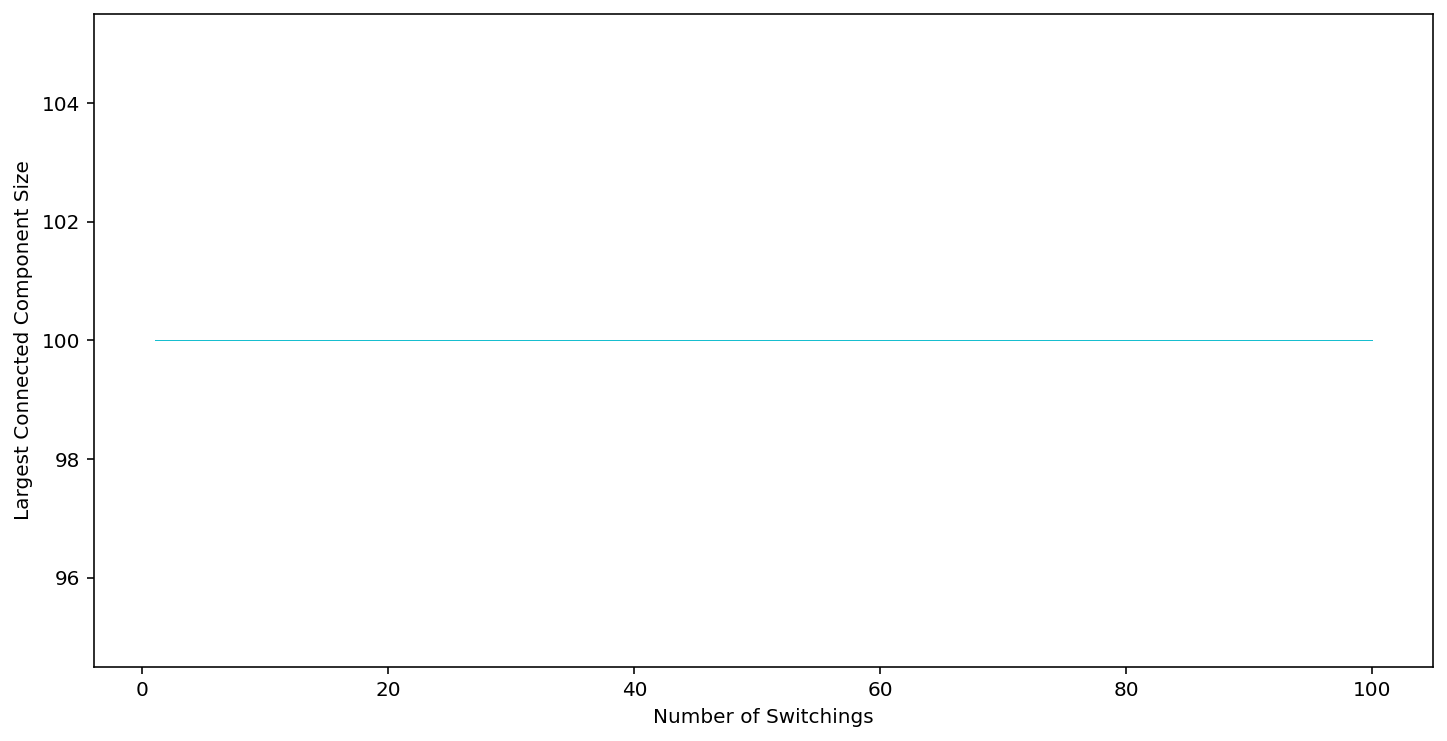

In [13]:
# the number of switchings
N = 100
#This is the number of random walks
W = 20
#This is the graph we are testing
G = nx.wheel_graph(100)


plt.figure(figsize=(12,6))
T = range(1,N+1)
plt.xlabel('Number of Switchings')
plt.ylabel('Largest Connected Component Size')

for i in range(W):
    X = largest_switch_component(G,N)
    plt.plot(T,X,linewidth=0.5,alpha=1)

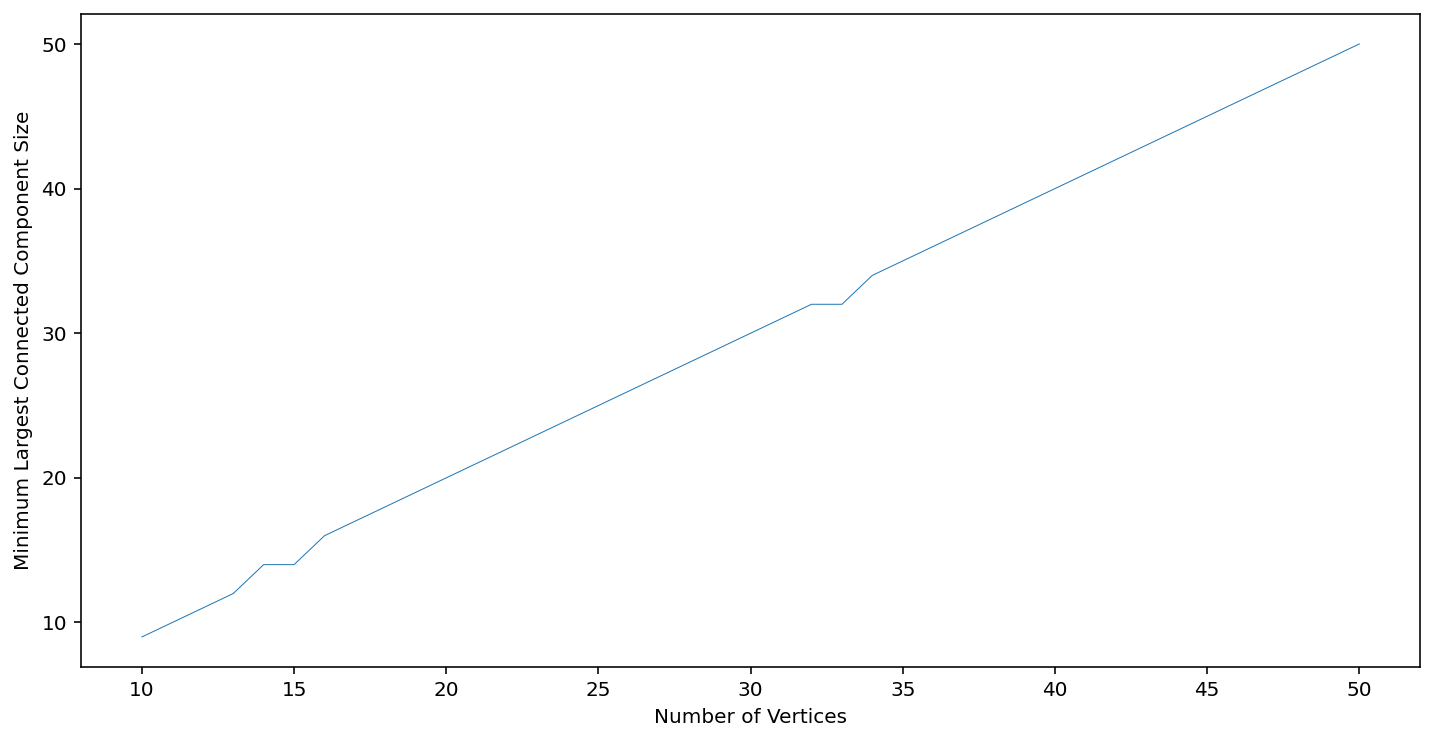

In [14]:
# the number of switchings
N = 1000
#The smallest complete graph to test
min_size = 10
max_size = 50

sizes = [i for i in range(min_size, max_size + 1)]
mins = []

#This is the graph we are testing
for i in range(min_size, max_size + 1):
    G = nx.wheel_graph(i)
    X = largest_switch_component(G,N)
    mins.append(np.amin(X))
    
plt.figure(figsize=(12,6))
T = range(1,N+1)
plt.xlabel('Number of Vertices')
plt.ylabel('Minimum Largest Connected Component Size')
plt.plot(sizes,mins,linewidth=0.5,alpha=1)